In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.utils import np_utils, to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import helpers
%matplotlib inline

Using TensorFlow backend.


In [2]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [3]:
from pygoose import *

In [4]:
project = kg.Project.discover()

In [6]:
df_train = pd.read_csv(project.data_dir + 'train.csv').fillna('none')
df_test = pd.read_csv(project.data_dir + 'test.csv').fillna('none')

In [32]:
y_train_lvl1 = list(df_train['lvl1'])
y_test_lvl1 = list(df_test['lvl1'])
y_train_lvl2 = list(df_train['lvl2'])
y_test_lvl2 = list(df_test['lvl2'])

### categories 

In [7]:
categories = {}
for lvl1 in set(df_train['lvl1']):
    categories[lvl1] = set(df_train[df_train['lvl1'] == lvl1]['lvl2'])

### Classes

In [8]:
classes_lvl1 = [  1,   3,   4,   5,   6,   7,   8,   9,  27,  40,  47,  59, 110, 140]

In [9]:
classes_lvl2 = [ 11,  12,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  29,  30,  31,  33,  34,  35,  36,  37,  38,  40,  42,
        43,  44,  45,  46,  51,  53,  55,  56,  57,  60,  61,  62,  64,
        65,  66,  67,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       162, 165, 166, 167, 168, 169, 172, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 265, 266, 267, 268, 269, 270, 272, 273,
       274, 275, 278, 279, 280, 281, 282, 283, 284, 285]

In [64]:
predicted_lvl1 = np.load('./CNN_lvl1_model/answers_train_lvl1.npy')

In [65]:
predicted_lvl2 = np.load('./CNN_lvl2_model/lvl2_answers_test.npy')

In [66]:
predicted_lvl1 = helpers.get_prediction_with_precision(classes_lvl1, predicted_lvl1, 1, True)
predicted_lvl2 = helpers.get_prediction_with_precision(classes_lvl2, predicted_lvl2, 1, True)

In [67]:
predicted_lvl1 = helpers.transform_prediction(predicted_lvl1)
predicted_lvl2 = helpers.transform_prediction(predicted_lvl2)

### Where do we do mistakes in lvl1 or lvl2 categories 

In [74]:
answers = pd.DataFrame()

In [75]:
len(y_train_lvl1)

500000

In [76]:
answers['predicted_lvl1'] = predicted_lvl1
answers['y_test_lvl1'] = y_train_lvl1
# answers['predicted_lvl2'] = predicted_lvl2
# answers['y_test_lvl2'] = y_test_lvl2

In [77]:
answers.head()

,predicted_lvl1,y_test_lvl1
0,27,110
1,4,5
2,27,27
3,27,5
4,27,3


In [59]:
mistakes = answers[answers['predicted_lvl1'] != answers['y_test_lvl1']]

In [37]:
predicted_lvl1 = [lvl1 for item in mistakes['predicted'] for lvl1, lvl2 in categories.items() if item in lvl2 ]

In [38]:
y_test_lvl1 = [lvl1 for item in mistakes['y_test'] for lvl1, lvl2 in categories.items() if item in lvl2 ]

In [39]:
mistakes['predicted_lvl1'] = predicted_lvl1
mistakes['y_test_lvl1'] = y_test_lvl1

/home/denys/Jiji/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/denys/Jiji/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
float(len(mistakes[mistakes['predicted_lvl1'] != mistakes['y_test_lvl1']]))/len(mistakes)

0.2436499991516365

In [43]:
mistakes[mistakes['predicted_lvl1'] != mistakes['y_test_lvl1']]

,predicted,y_test,predicted_lvl1,y_test_lvl1
9,46,118,9,110
15,20,37,4,8
18,113,160,110,140
39,17,29,3,6
49,132,144,110,140
74,142,116,140,110
75,53,17,4,3
104,146,23,140,4
126,100,147,47,140
130,160,37,140,8


In [44]:
from collections import Counter
import operator

In [45]:
misclassified_lvl2 = Counter(mistakes['y_test'].values)

In [46]:
misclassified_lvl1 = Counter(mistakes['y_test_lvl1'].values)

In [47]:
sorted_misclassified_lvl2 = sorted(misclassified_lvl2.items(), key=operator.itemgetter(1), reverse=True)

In [48]:
sorted_misclassified_lvl1 = sorted(misclassified_lvl1.items(), key=operator.itemgetter(1), reverse=True)

In [49]:
df_sorted_misclassified_lvl2 = pd.DataFrame(sorted_misclassified_lvl2, columns=['category', 'counter'])

In [50]:
df_sorted_misclassified_lvl1 = pd.DataFrame(sorted_misclassified_lvl1, columns=['category', 'counter'])

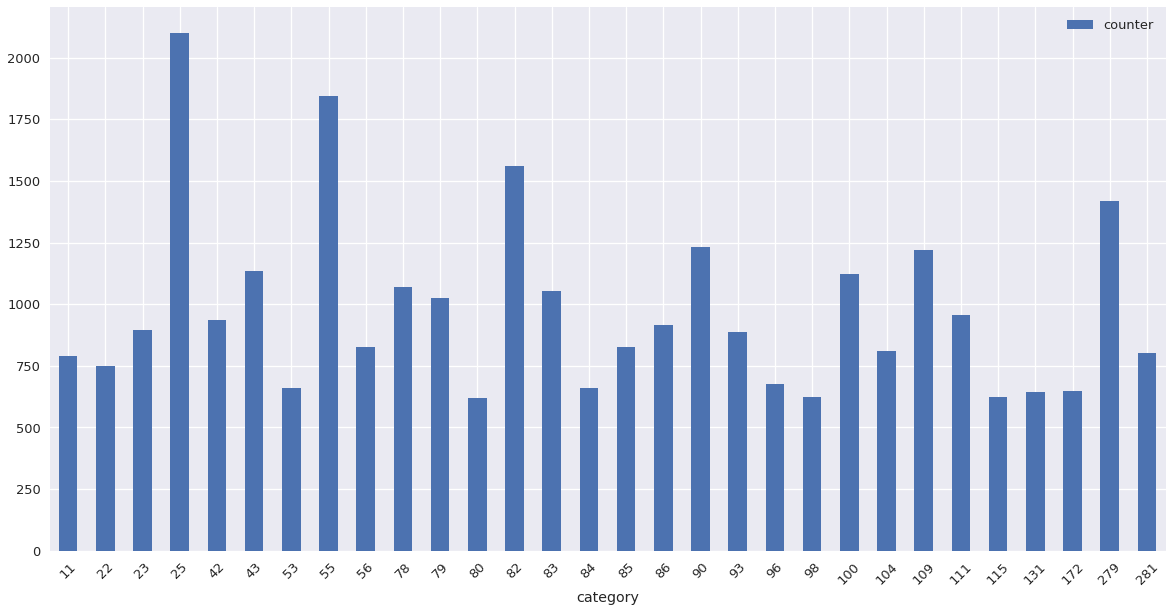

In [132]:
df_sorted_misclassified_lvl2[:30].groupby('category').sum().plot(kind='bar', rot=45)

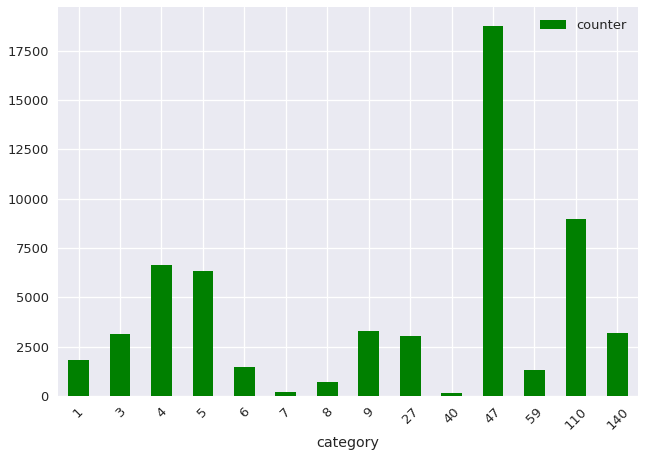

In [52]:
df_sorted_misclassified_lvl1.groupby('category').sum().plot(kind='bar', rot=45, color = 'green')

In [53]:
classes = encoder.classes_

In [54]:
M = confusion_matrix(mistakes['y_test'], mistakes['predicted'])

In [133]:
M_lvl1 = confusion_matrix(mistakes['y_test_lvl1'], mistakes['predicted_lvl1'])

In [77]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [158]:
classes_lvl1 = [  1,   3,   4,   5,   6,   7,   8,   9,  27,  40,  47,  59, 110, 140]
encoder_lvl1 = LabelEncoder()
encoder_lvl1.fit(cat_lvl1)

LabelEncoder()

In [159]:
def f_lvl1(j):
    j = encoder_lvl1.transform([j])[0]
    matplotlib.rcParams['figure.figsize'] = (20, 10)
    df = pd.DataFrame()
    category = []
    counter = []
    for i in np.where(M_lvl1[j,:] > 0)[0]:
        if i!=j:
            category.append(classes_lvl1[i])
            counter.append(M_lvl1[j,i])
    df['category'] = category
    df['counter'] = counter
    df.groupby('category').sum().plot(kind='bar', rot=45, color = 'green')
    fig, ax = plt.subplots()
    plt.show(block=True)
#     time.sleep(5)
    plt.close(fig)

In [154]:
def f(j):
    j = encoder.transform([j])[0]
    matplotlib.rcParams['figure.figsize'] = (20, 10)
    df = pd.DataFrame()
    category = []
    counter = []
    for i in np.where(M[j,:] > 0)[0]:
        if i!=j:
            category.append(classes[i])
            counter.append(M[j,i])
    df['category'] = category
    df['counter'] = counter
    df.groupby('category').sum().plot(kind='bar', rot=45, color = 'green')
    fig, ax = plt.subplots()
    plt.show(block=True)
#     time.sleep(5)
    plt.close(fig)

In [155]:
interact(f, j=classes);

In [160]:
interact(f_lvl1, j=classes_lvl1);

In [162]:
def f(x):
    return x

In [163]:
interact(f, x=10);

10

### Searilize model

In [36]:
model_json = model.to_json()
with open("CNN_lvl2_model/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CNN_lvl2_model/model.h5")
print("Saved model to disk")

Saved model to disk
